<a href="https://colab.research.google.com/github/Hamid-Ba/NYCHotel/blob/main/USHotels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from langdetect import detect
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import Adam
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import tensorflow as tf

I gathered data from https://www.kaggle.com/datasets/gdberrio/new-york-hotels.
in this dataset we have NYC Hotels Reviews.

In [2]:
hotel_df = pd.read_csv("/content/hotels.csv")

In [3]:
hotel_df.head()

,address,categories,city,country,latitude,longitude,name,postalCode,province,reviews.date,reviews.dateAdded,reviews.doRecommend,reviews.id,reviews.rating,reviews.text,reviews.title,reviews.userCity,reviews.username,reviews.userProvince
0,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2013-09-22T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,4.0,Pleasant 10 min walk along the sea front to th...,Good location away from the crouds,NaN,Russ (kent),NaN
1,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2015-04-03T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,5.0,Really lovely hotel. Stayed on the very top fl...,Great hotel with Jacuzzi bath!,NaN,A Traveler,NaN
2,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2014-05-13T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,5.0,Ett mycket bra hotell. Det som drog ner betyge...,Lugnt l��ge,NaN,Maud,NaN
3,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2013-10-27T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,5.0,We stayed here for four nights in October. The...,Good location on the Lido.,NaN,Julie,NaN
4,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2015-03-05T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,5.0,We stayed here for four nights in October. The...,������ ���������������,NaN,sungchul,NaN


In [4]:
# Count of Hotels Reviews
len(hotel_df)

35912

In [5]:
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35912 entries, 0 to 35911
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   address               35912 non-null  object 
 1   categories            35912 non-null  object 
 2   city                  35912 non-null  object 
 3   country               35912 non-null  object 
 4   latitude              35826 non-null  float64
 5   longitude             35826 non-null  float64
 6   name                  35912 non-null  object 
 7   postalCode            35857 non-null  object 
 8   province              35912 non-null  object 
 9   reviews.date          35653 non-null  object 
 10  reviews.dateAdded     35912 non-null  object 
 11  reviews.doRecommend   0 non-null      float64
 12  reviews.id            0 non-null      float64
 13  reviews.rating        35050 non-null  float64
 14  reviews.text          35890 non-null  object 
 15  reviews.title      

In [6]:
# Dropping some columns which has too null values and are unnecessary
hotel_df.drop(columns=['reviews.id', 'reviews.userCity',"reviews.userProvince","reviews.doRecommend"], inplace=True)

In [7]:
# Identifying duplicate rows
duplicate_rows = hotel_df.duplicated()

In [8]:
# Dropping duplicate rows
cleaned_hotel_df = hotel_df[~duplicate_rows]

In [9]:
# Identifying and counting missing values
missing_values_count = cleaned_hotel_df.isnull().sum()

print(missing_values_count)

address                 0
categories              0
city                    0
country                 0
latitude               86
longitude              86
name                    0
postalCode             55
province                0
reviews.date          259
reviews.dateAdded       0
reviews.rating        862
reviews.text           22
reviews.title        1622
reviews.username       43
dtype: int64


In [10]:
# Dropping rows with missing values
cleaned_hotel_df = hotel_df.dropna()

In [11]:
# Check dataset again
missing_values_count = cleaned_hotel_df.isnull().sum()

print(missing_values_count)

address              0
categories           0
city                 0
country              0
latitude             0
longitude            0
name                 0
postalCode           0
province             0
reviews.date         0
reviews.dateAdded    0
reviews.rating       0
reviews.text         0
reviews.title        0
reviews.username     0
dtype: int64


In [12]:
len(cleaned_hotel_df)

34016

In [13]:
# Define a function to detect the language of a given text string
def detect_language(text):
    try:
        lang = detect(text)
    except:
        lang = 'unknown'
    return lang

In [14]:
# We have some not english reviewer , let's remove them
cleaned_hotel_df['language'] = cleaned_hotel_df['reviews.text'].apply(detect_language)

<ipython-input-14-7cb5222ae115>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_hotel_df['language'] = cleaned_hotel_df['reviews.text'].apply(detect_language)


In [15]:
cleaned_hotel_df.head()

,address,categories,city,country,latitude,longitude,name,postalCode,province,reviews.date,reviews.dateAdded,reviews.rating,reviews.text,reviews.title,reviews.username,language
0,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2013-09-22T00:00:00Z,2016-10-24T00:00:25Z,4.0,Pleasant 10 min walk along the sea front to th...,Good location away from the crouds,Russ (kent),en
1,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2015-04-03T00:00:00Z,2016-10-24T00:00:25Z,5.0,Really lovely hotel. Stayed on the very top fl...,Great hotel with Jacuzzi bath!,A Traveler,en
2,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2014-05-13T00:00:00Z,2016-10-24T00:00:25Z,5.0,Ett mycket bra hotell. Det som drog ner betyge...,Lugnt l��ge,Maud,sv
3,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2013-10-27T00:00:00Z,2016-10-24T00:00:25Z,5.0,We stayed here for four nights in October. The...,Good location on the Lido.,Julie,en
4,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2015-03-05T00:00:00Z,2016-10-24T00:00:25Z,5.0,We stayed here for four nights in October. The...,������ ���������������,sungchul,en


In [16]:
cleaned_hotel_df = cleaned_hotel_df[cleaned_hotel_df['language']=='en'].reset_index(drop=True)

In [26]:
# Removing the 'language' column since it's no longer needed
cleaned_hotel_df = cleaned_hotel_df.drop(columns=['language'])

In [27]:
len(cleaned_hotel_df)

31999

In [28]:
# save it as preproccesd data 
cleaned_hotel_df.to_csv('/content/final_cleaned_hotel_dataset.csv', index=False)

In [29]:
%matplotlib inline

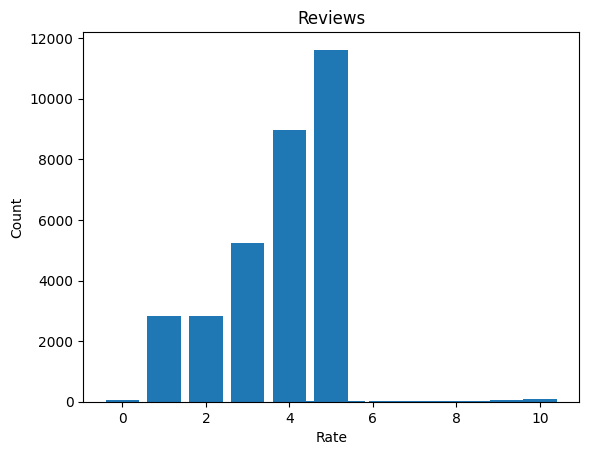

In [30]:
fig , ax = plt.subplots()

bar_data = cleaned_hotel_df["reviews.rating"].value_counts()
bar_x = bar_data.keys().tolist()
bar_y = bar_data.tolist()

ax.bar(bar_x,bar_y)
ax.set_title("Reviews")
ax.set_xlabel("Rate")
ax.set_ylabel("Count");

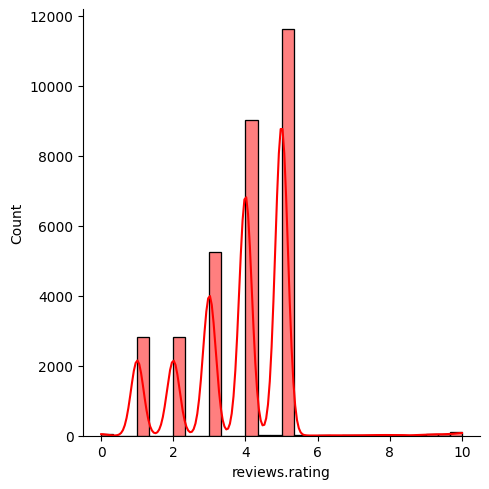

In [31]:
sns.displot(cleaned_hotel_df, x='reviews.rating', bins = 30, color = 'red',kde=True);

Here I Will Create a new Column as a Category .

**Positive** And **Negative** .

*   Positive : Thos One Which Their Rate is greater than 5.
*   Negative : Thos One Which Their Rate is lower than 5.



In [32]:
def categorize(rate):
  return "Pos" if rate >= 5 else "Neg"

In [33]:
cleaned_hotel_df["Category"] = cleaned_hotel_df["reviews.rating"].apply(categorize)

In [34]:
cleaned_hotel_df.sample(5)

,address,categories,city,country,latitude,longitude,name,postalCode,province,reviews.date,reviews.dateAdded,reviews.rating,reviews.text,reviews.title,reviews.username,Category
25247,7875 E Hwy 69,Hotels,Prescott Valley,US,34.585531,-112.326875,Arizona Inn of Prescott Valley,86314,AZ,2016-10-28T00:00:00Z,2016-11-15T21:08:57Z,2.0,The hotel is under construction so that might ...,Convenient,A Traveler,Neg
29016,12825 Ventura Blvd,Hotels,Studio City,US,34.144791,-118.411550,Sportsmen's Lodge,91604,CA,2016-03-29T00:00:00Z,2016-10-29T18:26:20Z,4.0,heater worked on and off. windows had a draft....,Place to stay,A Traveler,Neg
3750,13600 N W 2nd St,Hotels,Fort Lauderdale,US,26.123981,-80.331315,La Quinta Inn and Suites Sunrise,33325,Plantation,2016-06-17T00:00:00Z,2016-11-16T07:30:07Z,5.0,"This hotel is clean, comfortable and well run....",Huge Bang for Minimum Bucks,Hollis M,Pos
6825,920 N Rampart St,"Hotel,Hotels",New Orleans,US,29.962454,-90.066360,Best Western Plus French Quarter Landmark Hotel,70116-3011,LA,2016-02-05T00:00:00Z,2016-10-29T20:21:45Z,4.0,Went for Mardi Gras with friends,Mardi Gras,A Traveler,Neg
3008,2855 Main St,Hotels,Irvine,US,33.679710,-117.837279,Residence Inn By Marriott Irvine John Wayne Ai...,92614,CA,2015-10-23T00:00:00Z,2016-10-30T21:45:19Z,5.0,"Due to unforeseen circumstances, I ended up in...",Comfy hotel for an extended stay,Ryan,Pos


In [49]:
# Define a function to preprocess the text data
def preprocess_text(text):
    # Remove punctuations from the text
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Lowercase all text
    text = text.lower()
    
    # Tokenize the text into words
    words = text.split()
    
    # Remove stop words from the text using NLTK corpus
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    
    # Apply stemming to the words using Porter stemmer
    stemmer = PorterStemmer()
    words = [stemmer.stem(word) for word in words]
    
    # Join the preprocessed words back into text and return it
    return ' '.join(words)

In [70]:
# Preprocess the text data in the 'Review.Text' column of the dataframe using the above function
cleaned_hotel_df['reviews.text'] = cleaned_hotel_df['reviews.text'].apply(preprocess_text)

In [71]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Convert the text data to a sparse matrix of td-idf features
vectorizer = TfidfVectorizer(max_features=10000)
X_tfidf = vectorizer.fit_transform(cleaned_hotel_df['reviews.text'])

In [72]:
from keras.utils import to_categorical

# Convert the categorical labels to one-hot encoded vectors
y_onehot = to_categorical(cleaned_hotel_df['Category'].apply(lambda x: 0 if x == 'Neg' else 1))